In [8]:
\import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,accuracy_score


In [9]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [10]:
dataset = pd.read_csv('combined-dataset.csv')
print(dataset.columns)
dataset.head(20)

Index(['gold', 'platinum', 'palladium', 'tungsten', 'silver', 'y'], dtype='object')


,gold,platinum,palladium,tungsten,silver,y
0,43520,22464,21397,20007,24313,1
1,43534,22031,21513,19904,24052,1
2,43534,22554,21243,20086,24285,1
3,43588,22347,21179,20285,24279,1
4,75,22583,21516,19634,24203,1
5,23144,21949,20841,20448,24490,1
6,27635,22280,21984,19521,24288,1
7,26400,22167,20833,20764,24113,1
8,27318,23069,21733,19636,24339,1
9,26469,21838,20803,20391,24088,1


In [11]:
X = dataset.iloc[:,:5].values
y = dataset.iloc[:,5:6].values

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[:5])

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

One hot encoded array:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(140220, 5)
(140220, 13)
[0. 1.]


In [12]:

model = keras.Sequential()
model.add(keras.layers.Dense(5, input_shape=(5,)))
#model.add(keras.layers.Dense(120, activation='relu'))

model.add(keras.layers.Dense(190, activation='relu'))
model.add(keras.layers.Dense(590, activation='relu'))

model.add(keras.layers.Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200)
model.summary()

4382/4382 [==============================] - 11s 2ms/step - loss: 1.1776 - accuracy: 0.5763
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 190)               1140      
                                                                 
 dense_6 (Dense)             (None, 590)               112690    
                                                                 
 dense_7 (Dense)             (None, 13)                7683      
                                                                 
Total params: 121,543
Trainable params: 121,543
Non-trainable params: 0
_________________________________________________________________


In [13]:
predications = model.predict(X_test)
y_pred = list()
for i in range(len(predications)):
    y_pred.append(np.argmax(predications[i]))

ytest = list()
for i in range(len(y_test)):
    ytest.append(np.argmax(y_test[i]))

print('Accuracy is:', accuracy_score(ytest, y_pred)*100)
print('confusion_matrix ',confusion_matrix(ytest,y_pred))
print(classification_report(ytest, y_pred))

Accuracy is: 64.14313222079589
confusion_matrix  [[9962  474 1612  223  406   73   58  490  858  212   34  689  401]
 [ 948 2634    4  116 1122   54    0  622  912   31    4  107  735]
 [ 739    3 6433   18    2    2   53    7    2   18   28   47    0]
 [ 384  164   43 1987  528  570   28  245   85  169    7  528  128]
 [ 469 1057   26  263 3986   38   18  678  356   38   17   20  388]
 [ 227   48   14  958  127 2503    7   55   16  222    0  731   52]
 [   6    1  112    8    0    0 7078    5    2   16   92    9    0]
 [ 866 1019   30  223  916   43    8 2454 1007   26   10   90  630]
 [ 964 1016   32  141  256   11   23  484 3729   22    6  262  562]
 [ 161   20   34  162   10  407   26   25   17 5163    7  600    9]
 [   3    1    7    0    4    1  140    1    2   13 4788   27    0]
 [ 617   22   47  384   41  289   13   41  110  430   11 5352   62]
 [ 229  180    1   24   57    1    0  125  349    5   12   86 3892]]
              precision    recall  f1-score   support

           

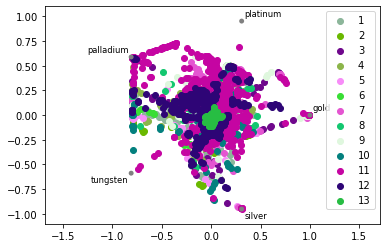

In [14]:
data = pd.read_csv("combined-dataset.csv")
plt.figure();
radviz(data, "y");